1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

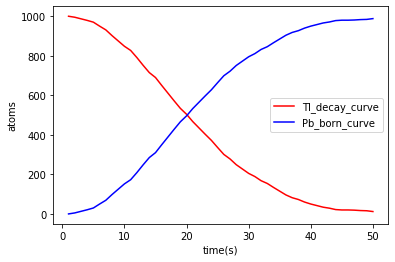

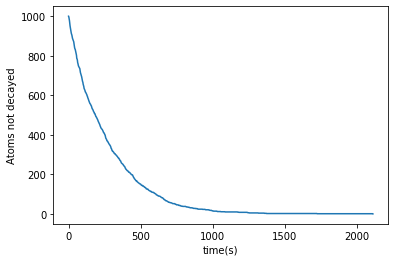

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 12346

tempo_caratteristico=3.052*60
atom_TI_208_ini=1000
atom_Pb_208_ini=0

time=np.linspace(1,50,50)
x=atom_TI_208_ini
y=atom_Pb_208_ini

atoms_TI=[atom_TI_208_ini]
atoms_Pb=[0]

for j in range(time.shape[0]-1):
    
    atom_TI_208_decay=0
    new_atom_Pb_208=0
    #x=x-atom_TI_208_decay
   # print(x)
    
    for i in range(x):
        
        decay_probability=1-2**( (-1)*(time[j]/tempo_caratteristico) )
        not_decay_probability=lcg()
        
        if not_decay_probability < decay_probability :
            atom_TI_208_decay+=1
            new_atom_Pb_208+=1
    
    x=x-atom_TI_208_decay
    y=y+new_atom_Pb_208
    atoms_TI.append(x)
    atoms_Pb.append(y)
    
atoms_TI=np.array(atoms_TI)
atoms_Pb=np.array(atoms_Pb)


plt.plot(time,atoms_TI,color="red",label="TI_decay_curve")
plt.plot(time,atoms_Pb,color="blue",label="Pb_born_curve")
plt.xlabel("time(s)")
plt.ylabel("atoms")
plt.legend(loc='best')  

plt.show()

def expon_icdf(p, mu=np.log(2)/tempo_caratteristico):
    
    return -np.log(1-p)/mu

decay_instants=[]

for i in range(atom_TI_208_ini):
    
    t=expon_icdf(lcg())
    decay_instants.append(t)
#estraggo tutti i tempi di ciascuno dei 1000 atomi di Titanio

decay_instants=np.array(decay_instants)

time=np.linspace(0,np.nanmax(decay_instants)+1,1000)

atoms_not_decayed=[]

for j in range(decay_instants.shape[0]):
    number_atom_decayed=0
    for i in range(decay_instants.shape[0]) :
        if decay_instants[i]<time[j]:
            number_atom_decayed+=1
            
   # print(number_atom_decayed)
    atoms_not_decayed.append(atom_TI_208_ini-number_atom_decayed)
    
        
atoms_not_decayed=np.array(atoms_not_decayed)   

plt.plot(time,atoms_not_decayed)
plt.xlabel("time(s)")
plt.ylabel("Atoms not decayed")
plt.show()
    
    
    

#print(tempo)
#print(np.exp(1))
#print(np.log(np.exp(1)))

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed

lcg.current = 12346

number_alpha_particle=10**6
ao=0.53 #Angstrom
sigma=ao/100
cost_struttura_fine=18.09512739*10**(-5) # (Mev*A)
hit=0



for i in range(number_alpha_particle):
    
    b=np.sqrt(-2*sigma**2*np.log(1-lcg()))
    x=79*cost_struttura_fine/(2*np.pi*7.7*b)
    
    if (np.pi)/2 < 2*np.arctan(x):
         hit+=1

fraction=hit/number_alpha_particle

print(" The fraction particles that come back is : " ,fraction ) 



 The fraction particles that come back is :  0.001524


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)


N=100000

count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1

I=2*count/N

error=np.sqrt(count*(N-count)/(N**3) )

print("The value of integral extimeted by hit/miss method is ",I)
print("The error of integral extimeted is ",error)

somma=0
value=[]

for j in range(N):
    x=2*np.random.random()
    somma+=f(x)
    value.append(f(x))

value=np.array(value)
var=np.var(value)

I2=2*somma/N
error2=2*np.sqrt(var/N)

print("The value of integral extimeted by mean method is ",I2)
print("The error of mean method is ",error2)

print("The errors are very similar and,indeed,it was understandble because of both go down as N**(-3/2)")

The value of integral extimeted by hit/miss method is  1.45216
The error of integral extimeted is  0.001410275978665169
The value of integral extimeted by mean method is  1.4526836964080214
The error of mean method is  0.001665131198329539
The errors are very similar and,indeed,it was understandble because of both go down as N**(-3/2)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 12346

def f(x,y):
    return x**2+y**2

N=1000000
count=0

for i in range(N):
    x=lcg()
    y=lcg()
    if f(x,y)<=1:
        count+=1

I=4*count/N

print("The integral value of unitary circle is : ",I)

count=0
sphare_dimension=10

#using hit or miss method
def F(X):
    return np.sum(np.square(X))

for j in range(N):
    x=[]
    for k in range (sphare_dimension):
        x.append(2*lcg()-1)
    x=np.array(x)
    
    if F(x)<=1: count+=1

Id=2**(sphare_dimension)*count/N

print("The value of integral of unitary sphare using hit or miss method in ",sphare_dimension," dimensions is ",Id)

#using mean value method
somma=[]

def F(X):
    return np.sum(np.square(X))

M=N

for j in range(M):
    x=[]
    for k in range (sphare_dimension):
        x.append(2*lcg()-1)
    x=np.array(x)
    
    if F(x)<=1: somma.append(F(x))
    
somma=np.array(somma)

Id2=2**(sphare_dimension)*np.sum(somma)/M

print("The value of integral of unitary sphare using mean value method in ",sphare_dimension," dimensions is ",Id2)

true_value=(np.pi)**(sphare_dimension/2)/math.factorial(sphare_dimension/2)
print("The correct value of the last integral is ",true_value)

The integral value of unitary circle is :  3.14366
The value of integral of unitary sphare using hit or miss method in  10  dimensions is  2.552832
The value of integral of unitary sphare using mean value method in  10  dimensions is  2.177020179591887
The correct value of the last integral is  2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 12346

def w(x):
    return(1/np.sqrt(x) )

def f(x):
    return(1/( np.exp(x) + 1 ) )


N=1000000
somma=0

for i in range(N):
    x=np.random.random()
    somma+=w(x)
    
I_w=somma/N


y=0

M=10000000

for j in range(M):
    x=abs(lcg()-0.2)   #ho sottratto 0.2 perchè ho notato che questa funzione decresce rapidamente nell'intervallo (0,1)
                       #occorre quindi essere certi che si campioni di più la parte bassa dell'intervallo che quella alta
    y+=f(x)
    
I=I_w*y/M

print("the integral value is : ",I)



the integral value is :  0.8346540486347697
